<a href="https://colab.research.google.com/github/pseudo-xy/pseudo-xy/blob/main/neural_net_on_fuel_economy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files 
upload = files.upload()

Saving fuel1.csv to fuel1.csv


In [14]:
import pandas as pd 
fuel = pd.read_csv('fuel1.csv')
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [16]:
fuel.shape[1]

14

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# creating label and features
X = fuel.copy()
y = X.pop('FE')

# creating a pipeline 
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [19]:
model.compile(optimizer='adam', loss='mae')

In [22]:
# training the model
history = model.fit(X, y, batch_size=128, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0325
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0393
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0327
Epoch 11/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0298
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

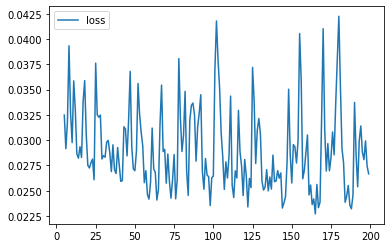

In [23]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();